### MARKETING ANALYTICS FINAL PROJECT - SENTIMENT ANALYSIS OF WOMEN'S CLOTHING REVIEWS
### Name and ID - Pramit Shetul Parikh - 0801037

In [473]:
import pandas as pd
import numpy as np
import re
import nltk
import string as st
import matplotlib.pyplot as plt
import csv

### Data Preperation and Cleaning

In [474]:
#Here I'm reading the data and saving it into a dataframe, df

df=pd.read_csv('C:\\Users\\prami\\Downloads\\Womens Clothing E-Commerce Reviews.csv',index_col=0)
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [475]:
df.tail()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses
23485,1104,52,Please make more like this one!,This dress in a lovely platinum is feminine an...,5,1,22,General Petite,Dresses,Dresses


#### Checking for Null Values

In [476]:
df.isnull()
#There is no empty data here, for each row we have data

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,False,False,True,False,False,False,False,False,False,False
1,False,False,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
23481,False,False,False,False,False,False,False,False,False,False
23482,False,False,False,False,False,False,False,False,False,False
23483,False,False,False,False,False,False,False,False,False,False
23484,False,False,False,False,False,False,False,False,False,False


In [477]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review Text              22641 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23472 non-null  object
 8   Department Name          23472 non-null  object
 9   Class Name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 2.0+ MB


### Here I am importing libraries to visualize the distribution of existing variables

In [614]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [479]:
#This is the column of most importance here

df['Review Text']

0        Absolutely wonderful - silky and sexy and comf...
1        Love this dress!  it's sooo pretty.  i happene...
2        I had such high hopes for this dress and reall...
3        I love, love, love this jumpsuit. it's fun, fl...
4        This shirt is very flattering to all due to th...
                               ...                        
23481    I was very happy to snag this dress at such a ...
23482    It reminds me of maternity clothes. soft, stre...
23483    This fit well, but the top was very see throug...
23484    I bought this dress for a wedding i have this ...
23485    This dress in a lovely platinum is feminine an...
Name: Review Text, Length: 23486, dtype: object

In [480]:
df['text_length'] = df['Review Text'].str.len()

### This distribution let's us see the most number of ratings recieved, as we can see here, there are alot of reviews with 5 star ratings

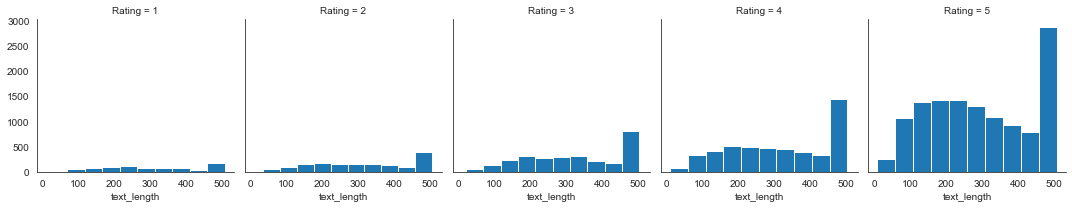

In [615]:
g = sns.FacetGrid(df,col='Rating',palette='viridis')
g.map(plt.hist,'text_length')

<AxesSubplot:xlabel='Rating', ylabel='count'>

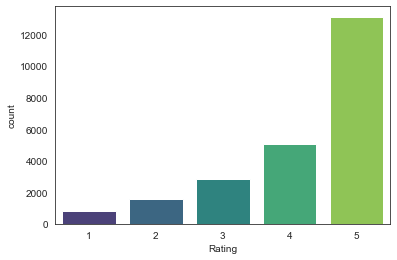

In [482]:
#This is a bar graph here with counts for each rating
sns.countplot(x='Rating',data=df,palette='viridis')

In [483]:
df.describe()

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count,text_length
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,22641.000000
mean,918.118709,43.198544,4.196032,0.822362,2.535936,308.687911
std,203.298980,12.279544,1.110031,0.382216,5.702202,143.940048
min,0.000000,18.000000,1.000000,0.000000,0.000000,9.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000,186.000000
50%,936.000000,41.000000,5.000000,1.000000,1.000000,301.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000,459.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000,508.000000


### No. of Women by age

(array([1646., 4421., 6575., 4516., 3229., 2215.,  691.,  112.,   68.,
          13.]),
 array([18. , 26.1, 34.2, 42.3, 50.4, 58.5, 66.6, 74.7, 82.8, 90.9, 99. ]),
 <BarContainer object of 10 artists>)

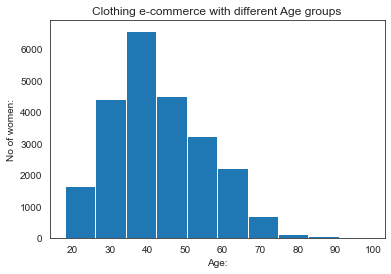

In [484]:
plt.xlabel('Age:')
plt.ylabel('No of women:')
plt.title('Clothing e-commerce with different Age groups')
plt.hist(df['Age'])

#Based on the distribution here, we can see that, 40 year old women shop the most.

### Histogram for average rating

(array([[4.500e+01, 0.000e+00, 8.000e+01, 0.000e+00, 0.000e+00, 2.120e+02,
         0.000e+00, 3.550e+02, 0.000e+00, 9.540e+02],
        [1.710e+02, 0.000e+00, 3.360e+02, 0.000e+00, 0.000e+00, 6.100e+02,
         0.000e+00, 9.490e+02, 0.000e+00, 2.355e+03],
        [2.090e+02, 0.000e+00, 4.600e+02, 0.000e+00, 0.000e+00, 8.140e+02,
         0.000e+00, 1.454e+03, 0.000e+00, 3.638e+03],
        [1.780e+02, 0.000e+00, 3.220e+02, 0.000e+00, 0.000e+00, 5.730e+02,
         0.000e+00, 1.029e+03, 0.000e+00, 2.414e+03],
        [1.260e+02, 0.000e+00, 1.910e+02, 0.000e+00, 0.000e+00, 3.480e+02,
         0.000e+00, 7.030e+02, 0.000e+00, 1.861e+03],
        [7.100e+01, 0.000e+00, 1.210e+02, 0.000e+00, 0.000e+00, 2.250e+02,
         0.000e+00, 4.290e+02, 0.000e+00, 1.369e+03],
        [3.500e+01, 0.000e+00, 4.000e+01, 0.000e+00, 0.000e+00, 7.600e+01,
         0.000e+00, 1.310e+02, 0.000e+00, 4.090e+02],
        [3.000e+00, 0.000e+00, 1.100e+01, 0.000e+00, 0.000e+00, 9.000e+00,
         0.000e+00, 2.

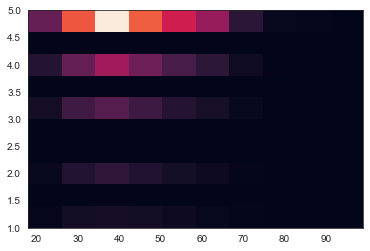

In [485]:
x1=df['Rating']
y1=df['Age']
plt.hist2d(y1,x1)

#Here, based on the histogram created, we can see the relation between ratings and age

### Cleaning the data

In [486]:
# Clean the text by removing any extra characters 
import re # tools for cleaning text
import nltk # library to perform NLP
nltk.download('stopwords') # tool to remove the non-essential words. It is a list of words
from nltk.corpus import stopwords
# Stemming means taking the root of the word such as love from loved or loving
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prami\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [487]:
# Steps for cleaning the first review and apply for loop on all the reviews
df['Review Text'][0]
review = re.sub('[^a-zA-Z]', ' ', df['Review Text'][0]) # only keep the letters so what we dont want to remove
review = review.lower() # make all letters as lowercase 
review = review.split()  # split the review into separate words to create a list of words
ps =PorterStemmer()
review = [ps.stem(word) for word in review if not  word in set(stopwords.words('english'))] # use set for larger text
review = ' '.join(review) # take the list of words back into the string

In [488]:
review

'absolut wonder silki sexi comfort'

In [ ]:
# Do the same steps for all the reviews in the dataset using the for loop
corpus = [] # Build a new list for all the words from all the reviews
# corpus is a collection of text and a common term used in NLP
for i in range (0, 1000):
    review = re.sub('[^a-zA-Z]', ' ', df['Review Text'][i] )
    review = review.lower()
    review = review.split()
    ps =PorterStemmer()
    review = [ps.stem(word) for word in review if not  word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [597]:
corpus

['absolut wonder silki sexi comfort',
 'love dress sooo pretti happen find store glad bc never would order onlin bc petit bought petit love length hit littl knee would definit true midi someon truli petit',
 'high hope dress realli want work initi order petit small usual size found outrag small small fact could zip reorder petit medium ok overal top half comfort fit nice bottom half tight layer sever somewhat cheap net layer imo major design flaw net layer sewn directli zipper c',
 'love love love jumpsuit fun flirti fabul everi time wear get noth great compliment',
 'shirt flatter due adjust front tie perfect length wear leg sleeveless pair well cardigan love shirt',
 'love traci rees dress one petit feet tall usual wear p brand dress pretti packag lot dress skirt long full overwhelm small frame stranger alter shorten narrow skirt would take away embellish garment love color idea style work return dress',
 'ade basket hte last mintu see would look like person store pick went teh darkl

In [ ]:
#Here, a new dataframe has been created to include ratings between 1 to 5 only in the new dataframe

New_DF = df[(df.Rating==1) | (df.Rating==5)]
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,text_length
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,53.0
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,303.0
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,500.0
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,124.0
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,192.0


In [613]:
#Here, I've created two objects X and y, where X will be the review text column and y will be the rating column

X = New_DF['Review Text']
y = New_DF['Rating']


In [609]:
#Now here, I'm importing the countvectorizer to convert my sentences into tokens of words for ease of analysis

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features= 5000)

In [610]:
#Here, I've used the fit.transform method to fit text values in the X column.

X = cv.fit_transform(X.values.astype('U'))
print(cv.get_feature_names())

['00', '00p', '0p', '0petite', '10', '100', '100lbs', '102', '102lbs', '103', '103lbs', '104', '105', '105lbs', '106', '107', '107lbs', '108', '109', '109lbs', '10p', '11', '110', '110lbs', '111', '112', '112lbs', '113', '114', '115', '115lbs', '116', '117', '117lbs', '118', '118lbs', '119', '12', '120', '120lb', '120lbs', '122', '123', '123lbs', '124', '125', '125lb', '125lbs', '126', '127', '127lbs', '128', '128lbs', '12p', '130', '130lb', '130lbs', '132', '133', '134', '135', '135lb', '135lbs', '136', '137', '138', '138lbs', '14', '140', '140lb', '140lbs', '142', '143', '144', '145', '145lb', '145lbs', '146', '146lbs', '148', '148lbs', '15', '150', '150lbs', '155', '155lbs', '16', '160', '160lb', '160lbs', '165', '17', '170', '170lbs', '175', '18', '180', '185', '19', '1960s', '1970', '1st', '20', '200', '2015', '20s', '21', '24', '24p', '25', '25p', '26', '26p', '27', '27p', '28', '29', '2nd', '2p', '30', '300', '30d', '30dd', '30f', '30s', '31', '32', '32a', '32b', '32c', '32d', '

In [611]:
X.shape

(13973, 5000)

### Train, Test and Split Using ML Models

### Using the Multinomial Naive Bayes Model first Analysis

In [612]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [514]:
# Fitting classifier to the Training set
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB().fit(X_train, y_train)

In [515]:
# Predicting the Test set results 
y_pred = classifier.predict(X_test)

In [516]:
# Make the Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_m = confusion_matrix(y_test, y_pred)
print(confusion_m)

[[ 144   65]
 [  53 3232]]


In [517]:
# Evaluate the results
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9662278191184889


In [518]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
prec_score = precision_score(y_test,y_pred)
recall_score= recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

In [519]:
print('Precision Score', prec_score)
print('Recall Score', recall_score)
print('F1 Score', f1)

Precision Score 0.7309644670050761
Recall Score 0.6889952153110048
F1 Score 0.7093596059113301


### Using the KNN Model

In [520]:
# Splitting the dataset into the Training set and Test set
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [521]:
from sklearn.neighbors import KNeighborsClassifier

In [522]:
knn = KNeighborsClassifier(n_neighbors=3).fit(x_train, y_train)

In [523]:
y_pred = knn.predict(x_test)

In [524]:
# Make the Confusion Matrix
confusion_m = confusion_matrix(y_test, y_pred)
print(confusion_m)

[[  10  199]
 [  29 3256]]


In [525]:
# Evaluate the results
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.934745277618775


In [526]:
prec_score = precision_score(y_test,y_pred)
rec= metrics.recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

In [527]:
print('Precision Score', prec_score)
print('Recall Score', recall_score)
print('F1 Score', f1)

Precision Score 0.2564102564102564
Recall Score 0.6889952153110048
F1 Score 0.08064516129032258


### Using the SVM Model

In [528]:
from sklearn.svm import SVC
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [529]:
clf = SVC(kernel='linear').fit(x_train, y_train)

In [530]:
# Predicting the Test set results 
y_pred = clf.predict(x_test)

In [531]:
confusion_m = confusion_matrix(y_test, y_pred)
print(confusion_m)

[[ 134   75]
 [  66 3219]]


In [532]:
# Evaluate the results
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9596451058958214


In [533]:
prec_score = precision_score(y_test,y_pred)
rec= metrics.recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

In [534]:
print('Precision Score', prec_score)
print('Recall Score', recall_score)
print('F1 Score', f1)

Precision Score 0.67
Recall Score 0.6889952153110048
F1 Score 0.6552567237163816


### Using the Decision Tree Model

In [535]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [536]:
 from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=0).fit(x_train, y_train)

In [537]:
# Predicting the Test set results 
y_pred = decision_tree.predict(x_test)

In [538]:
confusion_m = confusion_matrix(y_test, y_pred)
print(confusion_m)

[[  82  127]
 [ 110 3175]]


In [539]:
# Evaluate the results
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9321694333142531


In [540]:
prec_score = precision_score(y_test,y_pred)
rec= metrics.recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

In [541]:
print('Precision Score', prec_score)
print('Recall Score', recall_score)
print('F1 Score', f1)

Precision Score 0.4270833333333333
Recall Score 0.6889952153110048
F1 Score 0.4089775561097257


### Using the Random Forest Model

In [542]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [543]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier().fit(X_train, y_train)

In [544]:
# Predicting the Test set results 
y_pred = rf.predict(x_test)

In [545]:
confusion_m = confusion_matrix(y_test, y_pred)
print(confusion_m)

[[  22  187]
 [   3 3282]]


In [546]:
# Evaluate the results
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9456210646823126


In [547]:
prec_score = precision_score(y_test,y_pred)
rec= metrics.recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

In [548]:
print('Precision Score', prec_score)
print('Recall Score', recall_score)
print('F1 Score', f1)

Precision Score 0.88
Recall Score 0.6889952153110048
F1 Score 0.188034188034188


### Using the SVM Model

In [549]:
from sklearn.svm import SVC
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [550]:
clf = SVC(kernel='linear').fit(x_train, y_train)

In [551]:
# Predicting the Test set results 
y_pred = clf.predict(x_test)

In [552]:
confusion_m = confusion_matrix(y_test, y_pred)
print(confusion_m)

[[ 134   75]
 [  66 3219]]


In [553]:
# Evaluate the results
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9596451058958214


In [554]:
prec_score = precision_score(y_test,y_pred)
rec= metrics.recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

In [555]:
print('Precision Score', prec_score)
print('Recall Score', recall_score)
print('F1 Score', f1)

Precision Score 0.67
Recall Score 0.6889952153110048
F1 Score 0.6552567237163816


### TF IDF Model

In [556]:
from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer (max_features=5000, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))

In [560]:
#Here, I've used the fit.transform method to fit text values in the X column.


X = New_DF['Review Text']
y1 = New_DF['Rating']
X1 = tv.fit_transform(X.values.astype('U'))
print(tv.get_feature_names())

['00', '00p', '0p', '10', '100', '103', '104', '105', '108', '10p', '11', '110', '110lbs', '112', '115', '115lbs', '116', '117', '118', '119', '12', '120', '120lb', '120lbs', '122', '123', '123lbs', '124', '125', '125lbs', '126', '127', '128', '128lbs', '130', '130lbs', '132', '134', '135', '135lbs', '136', '137', '138', '14', '140', '140lbs', '142', '145', '145lbs', '15', '150', '150lbs', '155', '16', '160', '170', '18', '20', '200', '24', '25', '25p', '26', '27', '28', '29', '2nd', '2p', '30', '30d', '30dd', '31', '32', '32b', '32c', '32d', '32dd', '32ddd', '33', '34', '34a', '34b', '34c', '34d', '34dd', '34ddd', '34f', '35', '36', '36a', '36b', '36c', '36d', '36dd', '36ddd', '37', '38', '38c', '39', '3rd', '40', '44', '4p', '4th', '50', '55', '5ft', '60', '60s', '6ft', '6p', '70', '70s', '80', '8p', '90', '95', '99', 'ability', 'able', 'absolute', 'absolutely', 'abt', 'accent', 'accents', 'accentuate', 'accentuated', 'accentuates', 'acceptable', 'accessories', 'accessorize', 'accide

### Modelling with Naive Bayes

In [561]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.20, random_state=0)

In [562]:
# Fitting classifier to the Training set
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB().fit(X_train, y_train)

In [563]:
# Predicting the Test set results 
y_pred = classifier.predict(X_test)

In [564]:
confusion_m = confusion_matrix(y_test, y_pred)
print(confusion_m)

[[  19  145]
 [   2 2629]]


In [565]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9474060822898033


In [566]:
prec_score = precision_score(y_test,y_pred)
rec= metrics.recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

In [567]:
print('Precision Score', prec_score)
print('Recall Score', recall_score)
print('F1 Score', f1)

Precision Score 0.9047619047619048
Recall Score 0.6889952153110048
F1 Score 0.20540540540540542


### KNN Model

In [568]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X1, y1, test_size=0.25, random_state=0)

In [569]:
knn = KNeighborsClassifier(n_neighbors=3).fit(x_train, y_train)

In [570]:
# Predicting the Test set results 
y_pred = knn.predict(x_test)

In [571]:
confusion_m = confusion_matrix(y_test, y_pred)
print(confusion_m)

[[  47  162]
 [  11 3274]]


In [572]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9504865483686319


In [573]:
prec_score = precision_score(y_test,y_pred)
rec= metrics.recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

In [574]:
print('Precision Score', prec_score)
print('Recall Score', recall_score)
print('F1 Score', f1)

Precision Score 0.8103448275862069
Recall Score 0.6889952153110048
F1 Score 0.352059925093633


### SVM Model

In [575]:
from sklearn.svm import SVC
x_train, x_test, y_train, y_test = train_test_split(X1, y1, test_size=0.25, random_state=0)

In [576]:
clf = SVC(kernel='linear').fit(x_train, y_train)

In [577]:
# Predicting the Test set results 
y_pred = clf.predict(x_test)

In [578]:
confusion_m = confusion_matrix(y_test, y_pred)
print(confusion_m)

[[ 111   98]
 [  16 3269]]


In [579]:
# Evaluate the results
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9673726388093875


In [580]:
prec_score = precision_score(y_test,y_pred)
rec= metrics.recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

In [581]:
print('Precision Score', prec_score)
print('Recall Score', recall_score)
print('F1 Score', f1)

Precision Score 0.8740157480314961
Recall Score 0.6889952153110048
F1 Score 0.6607142857142857


### Decision Tree Model

In [582]:
x_train, x_test, y_train, y_test = train_test_split(X1, y1, test_size=0.25, random_state=0)

In [583]:
decision_tree = DecisionTreeClassifier(random_state=0).fit(x_train, y_train)

In [584]:
# Predicting the Test set results 
y_pred = decision_tree.predict(x_test)

In [585]:
confusion_m = confusion_matrix(y_test, y_pred)
print(confusion_m)

[[  81  128]
 [  82 3203]]


In [586]:
# Evaluate the results
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9398969662278192


In [587]:
prec_score = precision_score(y_test,y_pred)
rec= metrics.recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

In [588]:
print('Precision Score', prec_score)
print('Recall Score', recall_score)
print('F1 Score', f1)

Precision Score 0.49693251533742333
Recall Score 0.6889952153110048
F1 Score 0.43548387096774194


### Random Forest Model

In [589]:
x_train, x_test, y_train, y_test = train_test_split(X1, y1, test_size=0.25, random_state=0)

In [590]:
# Predicting the Test set results 
rf = RandomForestClassifier().fit(x_train, y_train)
y_pred = rf.predict(x_test)

In [591]:
confusion_m = confusion_matrix(y_test, y_pred)
print(confusion_m)

[[  45  164]
 [   7 3278]]


In [592]:
# Evaluate the results
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9510589582140813


In [593]:
prec_score = precision_score(y_test,y_pred)
rec= metrics.recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

In [594]:
print('Precision Score', prec_score)
print('Recall Score', recall_score)
print('F1 Score', f1)

Precision Score 0.8653846153846154
Recall Score 0.6889952153110048
F1 Score 0.3448275862068966


### Which model predicts the best?

|Name of the model| CountVectorizer | TF IDF(After Extraction) |
| :-  | :-  | :- |
|Naive Bayes Model| 0.9696 | 0.9474 |
|KNN Model| 0.9347 | 0.9504 |
|Support Vector Machine SVM Model| 0.9596 | 0.9673 |
|Decision Tree Model| 0.9321 | 0.9398 |
|Random Forest Model| 0.9456 | 0.9510 |

#### From the above accuracies table of the model performed on bag of words and using feature extraction TF-IDF, we can see which model which has highest accuracy.

#### The Naive Bayes Model predict's 96.96 % accuracy here using bag of words model and 94.74% accuracy with TF-IDF evaluation.
#### The SVM Model has the highest accuracy when it comes to TF IDF evaluation and is second in accuracy in bag of words model evaluation. So overall we can say that the SVM model is the best model here.

#### Overall the TF IDF Vectorizer has the higher accuracy when looking at all the models.